<a href="https://colab.research.google.com/github/MarialuizaLeao/NotebooksIC/blob/master/Aula_03_P_SVM_Hinge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles

import torch
import torch.optim as optim

import matplotlib.pyplot as plt

import pandas as pd

In [ ]:
plt.rcParams['figure.figsize'] = (8, 5)

plt.rcParams['axes.axisbelow'] = True 
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['axes.spines.bottom'] = True
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.ymargin'] = 0.1

plt.rcParams['font.family'] = 'serif'

plt.rcParams['axes.grid'] = True
plt.rcParams['grid.color'] = 'lightgrey'
plt.rcParams['grid.linewidth'] = .1

plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['xtick.bottom'] = True
plt.rcParams['xtick.direction'] = 'out' 
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['xtick.minor.width'] = .5
plt.rcParams['xtick.minor.visible'] = True

plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['ytick.left'] = True
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['ytick.minor.width'] = .5
plt.rcParams['ytick.minor.visible'] = True

plt.rcParams['legend.fontsize'] = 16

plt.rcParams['lines.linewidth'] = 4
plt.rcParams['lines.markersize'] = 10

In [ ]:
plt.style.use('tableau-colorblind10')
plt.ion()

In [ ]:
X, labels = make_blobs(n_samples=1000, random_state=42)

In [ ]:
type(labels)

numpy.ndarray

In [ ]:
X, y = make_blobs(n_samples=1000, random_state=42, centers=2)
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y[:, None], dtype=torch.float32)

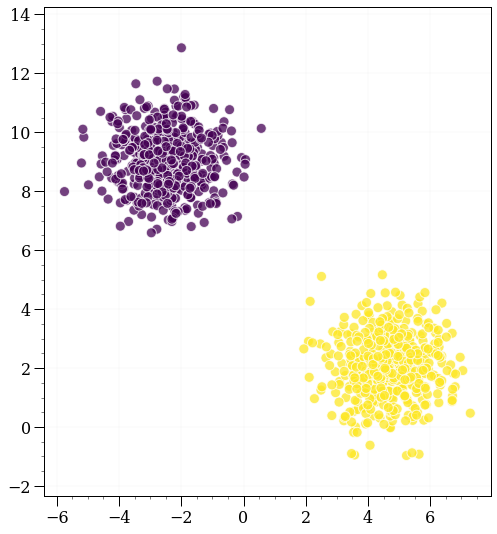

In [ ]:
_, ax = plt.subplots(figsize=(8, 9))
ax.scatter(X[:,0], X[:,1], c=y.ravel(), edgecolor='w', alpha=0.75)

In [ ]:
y[y == 0] = -1
y

tensor([[-1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [-1.],
        [ 1.],
        [-1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [-1.],
        [ 1.],
        [-1.],
        [ 1.],
        [ 1.],
        [-1.],
        [-1.],
        [-1.],
        [ 1.],
        [ 1.],
        [-1.],
        [ 1.],
        [ 1.],
        [-1.],
        [ 1.],
        [-1.],
        [-1.],
        [ 1.],
        [-1.],
        [ 1.],
        [-1.],
        [ 1.],
        [-1.],
        [ 1.],
        [-1.],
        [ 1.],
        [ 1.],
        [-1.],
        [ 1.],
        [-1.],
        [ 1.],
        [ 1.],
        [-1.],
        [-1.],
        [-1.],
        [ 1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [ 1.],
        [ 1.],
        [-1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [-1.],
        [-1.],
        [ 1.],
        [ 1.],
        [-1.],
        [-

In [ ]:
w = torch.zeros(size=(2, 1), dtype=X.dtype, requires_grad=True) + 2
b = torch.zeros(size=(1, 1), dtype=X.dtype, requires_grad=True) + 2

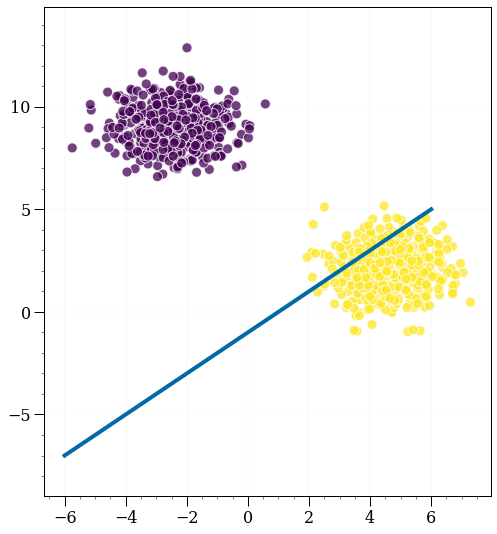

In [ ]:
# w[0, 0] * x1 + w[0, 1] * x2 + bias = 0
# w[0, 1] * x2 = w[0, 0] * x1 - bias
# x2 = (w[0, 0] * x1 - bias) / w[0, 1]

def get_line(x1, w, b):
    return (w[0, 0] * x1 - b) / w[1, 0]

_, ax = plt.subplots(figsize=(8, 9))
ax.scatter(X[:,0], X[:,1], c=labels, edgecolor='w', alpha=0.75)

x1 = torch.linspace(-6, 6, 100)
ax.plot(x1.detach().numpy().flatten(), 
get_line(x1, w, b).detach().numpy().flatten())

In [ ]:
def risk(
    y: torch.tensor,
    X: torch.tensor,
    w: torch.tensor,
    b: torch.tensor,
    lambda_=0.01,
):
    z = X @ w - b
    risk = torch.max(torch.tensor(0), (1.0 - y * z).ravel()).mean()
    risk += lambda_ * ((w * w).sum() + (b * b).sum())
    return risk

In [ ]:
w = torch.zeros(size=(2, 1), dtype=torch.float32) + 1.0
b = torch.zeros(size=(1, 1), dtype=torch.float32) + 1.0
w = torch.tensor(w, requires_grad=True)
b = torch.tensor(b, requires_grad=True)

r = risk(y, X, w, b)

<ipython-input-125-46ef7e2c8377>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  w = torch.tensor(w, requires_grad=True)
<ipython-input-125-46ef7e2c8377>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  b = torch.tensor(b, requires_grad=True)


In [ ]:
b

tensor([[1.]], requires_grad=True)

In [ ]:
sgd = optim.SGD((w, b), lr=0.01)
for i in range(100):
    sgd.zero_grad()
    r = risk(y, X, w, b)
    r.backward()
    sgd.step()

[(-12.0, 12.0), (-12.0, 12.0)]

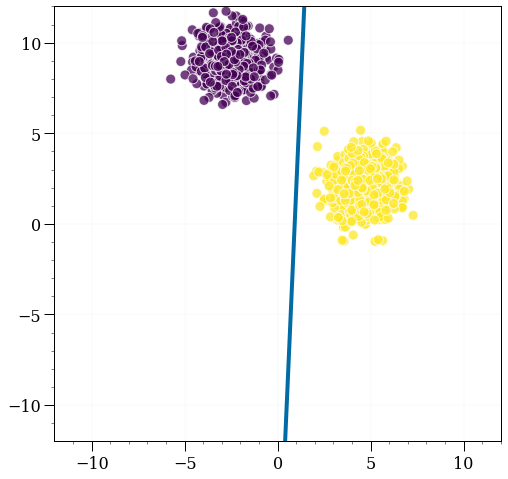

In [ ]:
_, ax = plt.subplots(figsize=(8, 8))
ax.scatter(X[:,0], X[:,1], c=labels, edgecolor='w', alpha=0.75)

x1 = torch.linspace(-6, 6, 100)
ax.plot(x1.detach().numpy().flatten(), 
get_line(x1, w, b).detach().numpy().flatten())
ax.set(xlim=(-12, 12), ylim=(-12, 12))

In [ ]:
torch.sign(activation(X @ w + b) - 1)

tensor([[3.1055],
        [3.8686],
        [2.0384],
        [3.2811],
        [4.8128],
        [4.0447],
        [3.3624],
        [3.7053],
        [2.1309],
        [4.1333],
        [3.0408],
        [3.0765],
        [3.2023],
        [2.3332],
        [2.4109],
        [3.5699],
        [3.3407],
        [3.2469],
        [3.9277],
        [3.9455],
        [3.2787],
        [2.8957],
        [4.6758],
        [4.2595],
        [1.8984],
        [3.4693],
        [4.4718],
        [4.1119],
        [3.0257],
        [3.0358],
        [1.7227],
        [2.1210],
        [3.3948],
        [2.8613],
        [1.8710],
        [3.3943],
        [3.0389],
        [2.1438],
        [3.6291],
        [3.7760],
        [3.3523],
        [4.2735],
        [1.9738],
        [4.8937],
        [3.7999],
        [3.0930],
        [4.1000],
        [3.6077],
        [4.0895],
        [2.5115],
        [3.1264],
        [2.8347],
        [2.8298],
        [2.9020],
        [3.2386],
        [3